In [1]:
#Širi prikaz u notebook-u
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pprint, genalg, json
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt

In [2]:
py.init_notebook_mode(connected=True)

In [3]:
%matplotlib inline

In [4]:
with open('podaci1.json', "r", encoding='utf-8-sig') as f:
    podaci = json.loads(f.read())

In [5]:
ulazni_podaci, generacije = genalg.glavna_funk(podaci, write_to_file=True, file_name="rezultati1.json")

  1. generacija -> population average fit: 9.774566567496734, best chromosome fit: None
  2. generacija -> population average fit: 9.774566567496734,  best chromosome fit: None
  3. generacija -> population average fit: 10.175842091011797,  best chromosome fit: None
  4. generacija -> population average fit: 116.34553931976887,  best chromosome fit: 817.15618166376
  5. generacija -> population average fit: 203.67230713778682,  best chromosome fit: 808.9846198471224
  6. generacija -> population average fit: 564.9161872977036,  best chromosome fit: 833.8328384324082
  7. generacija -> population average fit: 553.2133351408881,  best chromosome fit: 825.4102845088485
  8. generacija -> population average fit: 772.9458861690108,  best chromosome fit: 808.9020788186714
  9. generacija -> population average fit: 791.9221528017181,  best chromosome fit: 808.9020788186714
 10. generacija -> population average fit: 804.8656574453662,  best chromosome fit: 808.9020788186715
 11. generacija -> 

In [6]:
pprint.pprint(ulazni_podaci)

{'dani': [1, 2, 3, 4, 5],
 'dvorane': {0: {'id': 0, 'kapacitet': 100, 'naziv': 'D1', 'spec': {'P'}},
             1: {'id': 1, 'kapacitet': 75, 'naziv': 'D2', 'spec': {'P', 'S'}},
             2: {'id': 2, 'kapacitet': 95, 'naziv': 'D3', 'spec': {'P', 'S'}},
             3: {'id': 3, 'kapacitet': 30, 'naziv': 'D4', 'spec': {'L'}},
             4: {'id': 4, 'kapacitet': 45, 'naziv': 'D5', 'spec': {'L'}},
             5: {'id': 5, 'kapacitet': 70, 'naziv': 'D6', 'spec': {'P', 'S'}}},
 'grupe': {0: {'id': 0, 'kapacitet': 90, 'naziv': 'G1'},
           1: {'id': 1, 'kapacitet': 50, 'naziv': 'G2'},
           2: {'id': 2, 'kapacitet': 30, 'naziv': 'G3'},
           3: {'id': 3, 'kapacitet': 70, 'naziv': 'G4'}},
 'kolegiji': {0: {'id': 0, 'naziv': 'Digitalna logika'},
              1: {'id': 1, 'naziv': 'Inteligentni sustavi'},
              2: {'id': 2, 'naziv': 'Teorija kaosa'},
              3: {'id': 3, 'naziv': 'Odabrana poglavlja matematike'},
              4: {'id': 4, 'naziv': 'Infor

In [7]:
pprint.pprint(genalg.json_rez(generacije['best'], ulazni_podaci))

('[{"fit": 833.8328384324082, "hard_dev": 0, "hard_pos": [], "jedinka": '
 '[{"dan": 3, "dvorana": "D3", "grupa": "G1", "kolegij": "Odabrana poglavlja '
 'matematike", "profesor": "Nikola Kavezić", "termin": [2, 3, 4]}, {"dan": 4, '
 '"dvorana": "D1", "grupa": "G1", "kolegij": "Baze podataka 1", "profesor": '
 '"Ivan Ivanek", "termin": [10]}, {"dan": 1, "dvorana": "D1", "grupa": "G2", '
 '"kolegij": "Baze podataka 1", "profesor": "Blanka Ljubić", "termin": [9, '
 '10]}, {"dan": 2, "dvorana": "D3", "grupa": "G2", "kolegij": "Informatika 1", '
 '"profesor": "Jasmin Starwars", "termin": [1, 2]}, {"dan": 3, "dvorana": '
 '"D6", "grupa": "G2", "kolegij": "Teorija kaosa", "profesor": "Jelena '
 'Guljaš", "termin": [11, 12]}, {"dan": 5, "dvorana": "D5", "grupa": "G3", '
 '"kolegij": "Digitalna logika", "profesor": "Jasmin Starwars", "termin": [4, '
 '5]}, {"dan": 3, "dvorana": "D5", "grupa": "G3", "kolegij": "Informatika 1", '
 '"profesor": "Blanka Ljubić", "termin": [5, 6]}, {"dan": 1, "dvor

In [17]:
def plot_generation_fitness(ulazni_podaci):
    x = list(range(len(generacije['all'])))
    y = [populacija['avg_fit'] for populacija in generacije['all']]
    y_lower = [populacija['avg_fit'] - populacija['std_fit'] for populacija in generacije['all']]
    y_upper = [populacija['avg_fit'] + populacija['std_fit'] for populacija in generacije['all']]

    upper_bound = go.Scatter(
        name='Gornja vrijednost',
        x=x,
        y=y_upper,
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    trace = go.Scatter(
        name='Prosječna vrijednost karakteristične funkcije',
        x=x,
        y=y,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    lower_bound = go.Scatter(
        name='Donja vrijednost',
        x=x,
        y=y_lower,
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines')

    # Trace order can be important
    # with continuous error bars
    data = [lower_bound, trace, upper_bound]

    layout = go.Layout(
        yaxis=dict(title='Fitness populacije', range=[0, 1000]),
        xaxis=dict(title='Generacije populacija', type='category'),
        title='Fitness populacija svih generacija',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='fitness-all-generations')

In [18]:
plot_generation_fitness(ulazni_podaci)

In [10]:
def plot_fitness(ulazni_podaci):
    x = list(range(ulazni_podaci['parametri']['n_pop']))
    data = []
    for i in range(len(generacije['all'])):
        data.append(go.Bar(x=x, y=[jedinka['fit'] for jedinka in generacije['all'][i]['all']], visible = False, name="fitness"))
    data[0]['visible'] = True
    steps = []
    for i in range(len(data)):
        step = dict(method = 'update', 
                    args = [{'visible': [t == i for t in range(len(data))]}, 
                            {'title.text': f'Fitness populacija {i + 1}. generacije'}], 
                    label = f'{i + 1}. gen')
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Generacija: "},
        pad={"t": 50},
        steps=steps,
        transition=dict(easing = "bounce-in-out")
    )]
    layout = go.Layout(
        yaxis=dict(title='Fitness jedinki', range=[0, 1000]),
        xaxis=dict(title='Jedinke generacija', type='category'),
        title=f'Fitness populacija 1. generacije',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(
        sliders=sliders
    )
    py.iplot(fig, filename='fitness-one-population')

In [11]:
plot_fitness(ulazni_podaci)

In [12]:
def plot_restrictions(ulazni_podaci):
    x = list(range(ulazni_podaci['parametri']['n_pop']))
    data = []
    for i in range(len(generacije['all'])):
        data.append(go.Bar(x=x, y=[len(jedinka['hard_pos']) for jedinka in generacije['all'][i]['all']], visible = False, name="hard"))
    for i in range(len(generacije['all'])):
        data.append(go.Bar(x=x, y=[len(jedinka['soft_pos']) for jedinka in generacije['all'][i]['all']], visible = False, name="soft"))
    data[0]['visible'] = data[len(generacije['all'])]['visible'] = True
    steps = []
    for i in range(len(data) // 2):
        step = dict(method = 'update', 
                    args = [{'visible': [t == i or len(data) // 2 + i == t for t in range(len(data))]}, 
                            {'title.text': f'Fitness populacija {i + 1}. generacije'}], 
                    label = f'{i + 1}. gen')
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Generacija: "},
        pad={"t": 50},
        steps=steps,
        transition=dict(easing = "bounce-in-out")
    )]
    layout = go.Layout(
        yaxis=dict(title='Broj narušenih ograničenja'),
        xaxis=dict(title='Jedinke generacija', type='category'),
        title=f'Broj narušenih ograničenja 1. generacije',
        showlegend = True)

    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(
        barmode='group',
        sliders=sliders
    )
    py.iplot(fig, filename='violation-one-population')

In [13]:
plot_restrictions(ulazni_podaci)

In [14]:
def plot_prof_pref(ulazni_podaci):
    def pref_matrix(ulazni_podaci, prof_id):
        podaci = {r['dan']: sorted(list(r['termini'])) for r in ulazni_podaci['preferencije']['profesori'][prof_id]['odabir']}
        podaci.update({d: [] for d in ulazni_podaci['dani'] if d not in podaci})
        return [[1.0 if j in podaci[i] else 0.0 for i in ulazni_podaci['dani']] for j in ulazni_podaci['termini']]

    fig = plt.figure()
    fig, ax = plt.subplots(1, len(ulazni_podaci['preferencije']['profesori']), figsize=(12,12))
    fig.suptitle("Preferencije termina profesora", fontsize="xx-large")
    for j in range(len(ulazni_podaci['preferencije']['profesori'])):
        ax[j].set_xticks([i - 0.5 for i in range(len(ulazni_podaci['dani']))], minor=True)
        ax[j].set_yticks([i - 0.5 for i in range(len(ulazni_podaci['termini']))], minor=True)
        ax[j].grid(which="minor", color="w", linestyle='-', linewidth=3)
        ax[j].tick_params(top=True, bottom=True, labeltop=True, labelbottom=True, right=True, left=True, labelright=True, labelleft=True)
        ax[j].set_xticklabels(['']+[str(d) for d in ulazni_podaci['dani']])
        ax[j].set_yticklabels(['']+[str(t) for t in ulazni_podaci['termini']])
        tick_spacing = 1
        ax[j].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax[j].yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
        ax[j].set_title(f"Preferencije termina profesora '{ulazni_podaci['nastavnici'][ulazni_podaci['preferencije']['profesori'][j]['p_id']]['preime']}'")
        ax[j].set_xlabel('Dani')
        ax[j].set_ylabel('Termini')
        heatplot = ax[j].imshow(pref_matrix(ulazni_podaci, j), cmap=mpl.colors.LinearSegmentedColormap.from_list("", ["coral","lightgreen"]))

<Figure size 432x288 with 0 Axes>

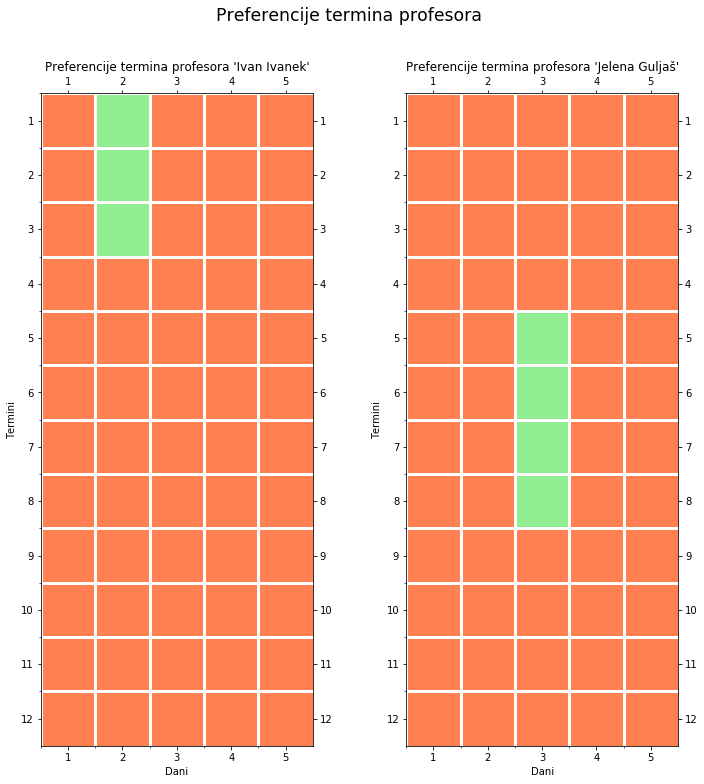

In [15]:
plot_prof_pref(ulazni_podaci)